In [1]:
import numpy
import math
import cmath
from matplotlib import pyplot
%matplotlib inline

In [8]:
def JoukowskiTransform(zetamat, zetac, a):
    zmat = (zetamat+zetac) + a**2/(zetamat+zetac)
    return zmat

In [9]:
#Define grid
ngr = 12; ngtheta = 50

#Airfoil params
c = 1
T = 0.1
H = 0.02
a = c/4
r_s = (0.25 +T/(3*math.sqrt(3)))
zeta_c = -4*a/(3*math.sqrt(3))*T + 1j*2*a*H


azimuth = numpy.radians(numpy.linspace(-180,180,ngtheta));
rad = numpy.linspace(r_s,2*r_s,ngr);

r, theta = numpy.meshgrid(rad, azimuth)
zeta = r*numpy.exp(1j*theta)

Z = JoukowskiTransform(zeta, zeta_c,a)

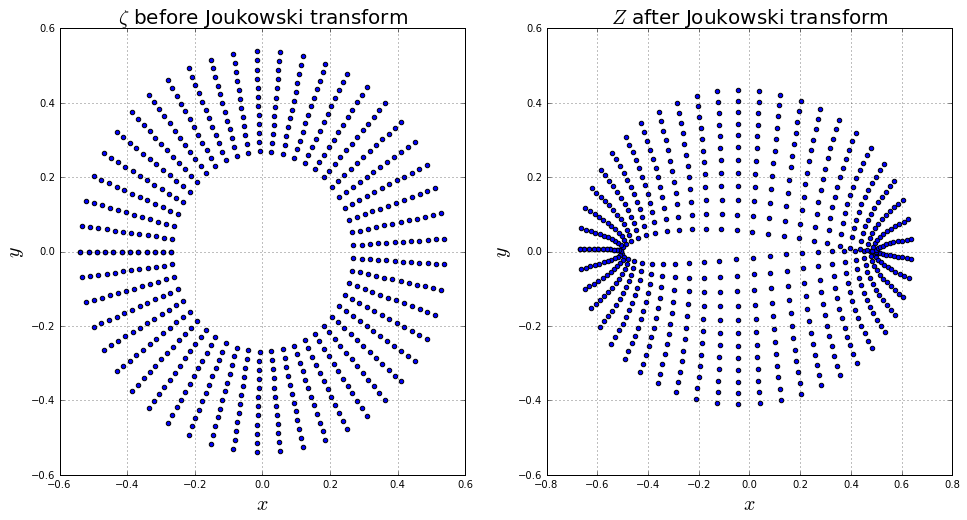

In [10]:
pyplot.figure(figsize=(16,8))
pyplot.subplot(121)
pyplot.scatter(zeta.real, zeta.imag)
pyplot.xlabel('$x$', fontsize = 20)
pyplot.ylabel('$y$', fontsize = 20)
pyplot.title('$\zeta$ before Joukowski transform', fontsize = 20)
pyplot.grid(True)

pyplot.subplot(122)
pyplot.scatter(Z.real, Z.imag)
pyplot.xlabel('$x$', fontsize = 20)
pyplot.ylabel('$y$', fontsize = 20)
pyplot.title('$Z$ after Joukowski transform', fontsize = 20)
pyplot.grid(True)

In [52]:
ngrad = 100; ngtheta = 100

azimuth = numpy.radians(numpy.linspace(-180,180,ngtheta));
rad = numpy.linspace(0.1,5.0,ngrad);

r, theta = numpy.meshgrid(rad, azimuth)

rc = 0.3; thetac = 2./3.*math.pi
zeta_c = rc + 1j*thetac

uinf = 1.0; a = 1.0; 
gamma = 4.0
kappa = 2.0*math.pi*uinf

ur1 = uinf*numpy.cos(theta); ut1 = -uinf*numpy.sin(theta)
ur2 = numpy.zeros_like(r); ut2 = -gamma/(2.0*numpy.pi*(r))
ur3 = -kappa/(2.0*numpy.pi)*numpy.cos(theta-thetac)/(r)**2; 
ut3 = -kappa/(2.0*numpy.pi)*numpy.sin(theta-thetac)/(r)**2

ur = ur1 + ur2 + ur3; ut = ut1 + ut2 + ut3

w = ur - 1j*ut

wz = JoukowskiTransform(w, zeta_c,a)


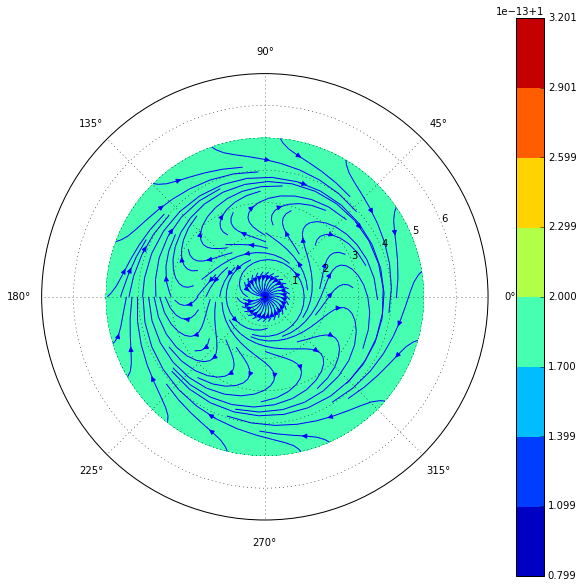

In [67]:
fig, ax = pyplot.subplots(subplot_kw=dict(projection='polar'))
ax.figure.set_figheight(10); ax.figure.set_figwidth(10)
contf = ax.contourf(theta, r, numpy.sqrt(ut1**2 + ur1**2))
stream = ax.streamplot(azimuth, rad, ut1, ur1)
#stream = ax.streamplot(rad, azimuth, ur1, ut1)
cbar = ax.figure.colorbar(contf)
#plotx = r*numpy.cos(theta)
#ploty = r*numpy.sin(theta)
#plotu = abs(w)*numpy.cos(theta)
#plotv = abs(w)*numpy.sin(theta)

#pyplot.streamplot( plotx, ploty, plotu, plotv)